In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster

In [3]:
Acci_bkk = pd.read_csv("C:/Users/LENOVO/Desktop/Geodatasci/accident_sample_bkk-main/event2019_BKK.csv")

In [4]:
Acci_bkk

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [6]:
Acci_bkk = np.array(Acci_bkk[['latitude','longitude']].values.tolist())
Acci_bkk

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [7]:
n_clusters=600

In [8]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(Acci_bkk)

KMeans(n_clusters=600)

In [9]:
cluster_labels = kmeans.labels_
SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.

In [10]:
SS

0.00046435701944656755

In [36]:
import folium as fo
from folium.plugins import MarkerCluster
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 10)
latitudes = list(Acci_bkk[:,0])
longitudes = list(Acci_bkk[:,1])


locations = list(zip(latitudes, longitudes))
cluster= MarkerCluster(locations=locations)
station_map.add_child(cluster)
station_map

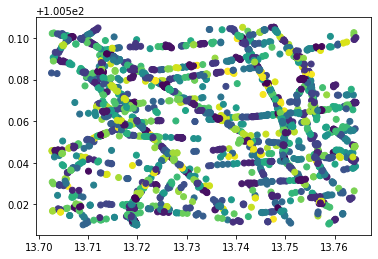

In [32]:
plt.scatter(Acci_bkk[:,0], Acci_bkk[:,1], c=cluster_labels, cmap='viridis')


In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(Acci_bkk, cluster_labels)

In [17]:
sample_silhouette_values = silhouette_samples(Acci_bkk, cluster_labels)

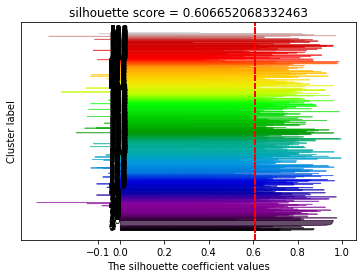

In [18]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
          0, ith_cluster_silhouette_values,
          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("silhouette score = " + str(silhouette_avg))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])